In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from generation.dataset.data_utils import get_event_detector_df, \
get_event_detector_signal, get_event_detector_df_path, \
get_detector_training_data

In [2]:
_DETECTOR = 0

### Data preparation

In [3]:
from generation.dataset.signals_dataset import SignalsDataset, Scaler

In [4]:
SAMPLE_SIZE = 2048

signals_dataset = SignalsDataset(_DETECTOR, SAMPLE_SIZE)
noises = signals_dataset.noises

/datadrive/pafakanov/hse/hep_generative_models/generation/dataset/signals_dataset.py:55: RuntimeWarning: invalid value encountered in true_divide
  data = (data - min_values[:, None]) / (max_values - min_values)[:, None]


In [5]:
fft_noises = np.fft.rfft(noises)
real_noises = np.real(fft_noises)
img_noises = np.imag(fft_noises)

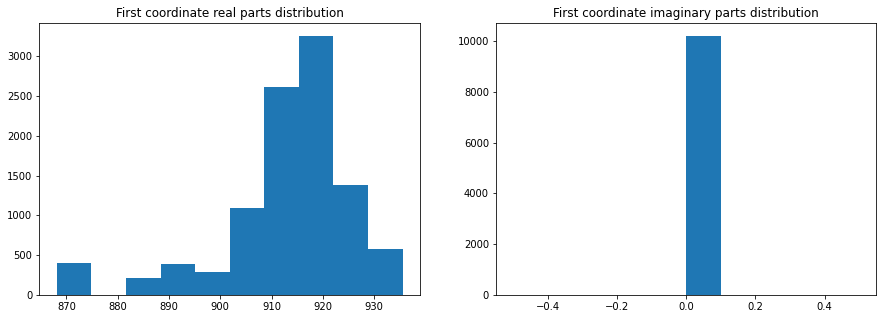

In [6]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title("First coordinate real parts distribution")
ax[0].hist(real_noises[:, 0])
ax[1].set_title("First coordinate imaginary parts distribution")
ax[1].hist(img_noises[:, 0])
plt.show()

##### We do not have to use the first coordinate after fft transform, as it responsible only for absolute shift

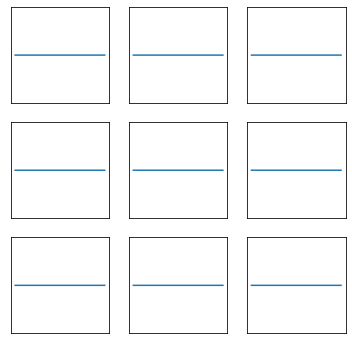

In [7]:
first_real = 0
first_img = 0

f, ax = plt.subplots(3, 3, figsize=(6, 6))

for i in range(9):
    idx = np.random.choice(range(len(noises)))
    new_real = np.concatenate([[first_real], real_noises[idx][1:]])
    new_img = np.concatenate([[first_img], img_noises[idx][1:]])
    new_signal = np.real(np.fft.irfft(new_real + (1j * new_img)))
    ax[i // 3][i % 3].set_xticks([])
    ax[i // 3][i % 3].set_yticks([])
    ax[i // 3][i % 3].plot(np.round(new_signal - noises[idx], 5))
plt.show()

In [8]:
real_noises = real_noises[:, 1:]
img_noises = img_noises[:, 1:]

### Scatter plots after fourier transform

In [9]:
def plot_scatter():
    f, ax = plt.subplots(3, 3, figsize=(9, 9))

    for i in range(9):
        idx = np.random.choice(range(len(fft_noises)))
        ax[i // 3][i % 3].scatter(real_noises[idx], img_noises[idx])

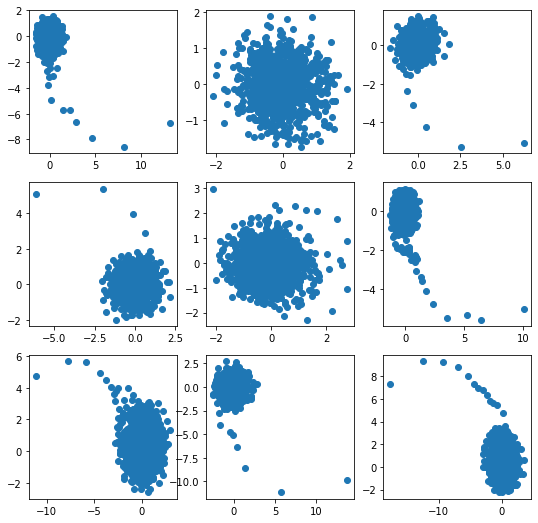

In [10]:
plot_scatter()

#### Scaling

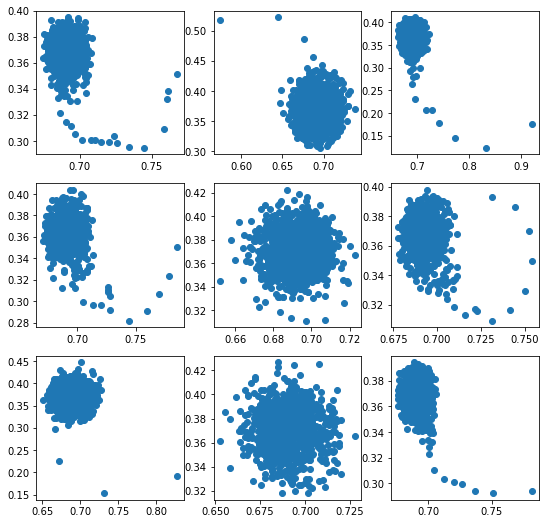

In [11]:
img_scaler = Scaler()
img_noises = img_scaler.fit_transform(img_noises)

real_scaler = Scaler()
real_noises = real_scaler.fit_transform(real_noises)

plot_scatter()